In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()




Saving Enron_Txt_fn.csv to Enron_Txt_fn.csv


In [3]:
df = pd.read_csv("Enron_Txt_fn.csv")
df.head()
df.columns

Index(['label', 'email', 'filename'], dtype='object')

In [4]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()


In [5]:
df['clean_text'] = df['email'].apply(clean_text)

X = df['clean_text']
y = df['label']


In [6]:
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(X)


In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_tfidf, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=(20/30), random_state=42
)


In [8]:
nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB()

Naive Bayes Validation Accuracy: 0.9869474933254228
Naive Bayes Test Accuracy: 0.9859134045077106

Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3317
           1       0.99      0.99      0.99      3427

    accuracy                           0.99      6744
   macro avg       0.99      0.99      0.99      6744
weighted avg       0.99      0.99      0.99      6744



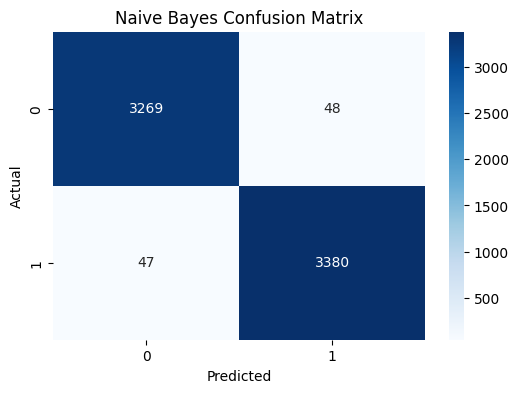

In [9]:
nb_val_pred = nb.predict(X_val)
nb_test_pred = nb.predict(X_test)

print("Naive Bayes Validation Accuracy:", accuracy_score(y_val, nb_val_pred))
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, nb_test_pred))
print("\nNaive Bayes Classification Report:\n")
print(classification_report(y_test, nb_test_pred))

cm_nb = confusion_matrix(y_test, nb_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
svm = LinearSVC()
svm.fit(X_train, y_train)


LinearSVC()

SVM Validation Accuracy: 0.9905072678730347
SVM Test Accuracy: 0.9899169632265717

SVM Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3317
           1       0.98      1.00      0.99      3427

    accuracy                           0.99      6744
   macro avg       0.99      0.99      0.99      6744
weighted avg       0.99      0.99      0.99      6744



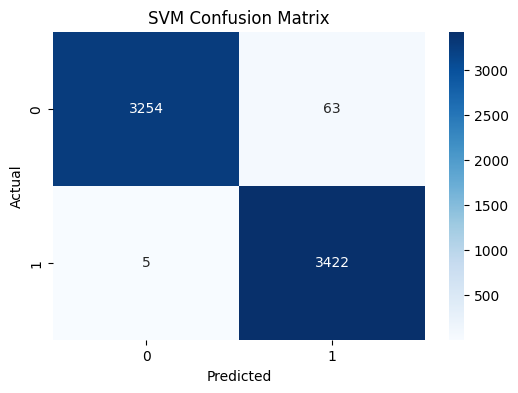

In [11]:
svm_val_pred = svm.predict(X_val)
svm_test_pred = svm.predict(X_test)

print("SVM Validation Accuracy:", accuracy_score(y_val, svm_val_pred))
print("SVM Test Accuracy:", accuracy_score(y_test, svm_test_pred))
print("\nSVM Classification Report:\n")
print(classification_report(y_test, svm_test_pred))

cm_svm = confusion_matrix(y_test, svm_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


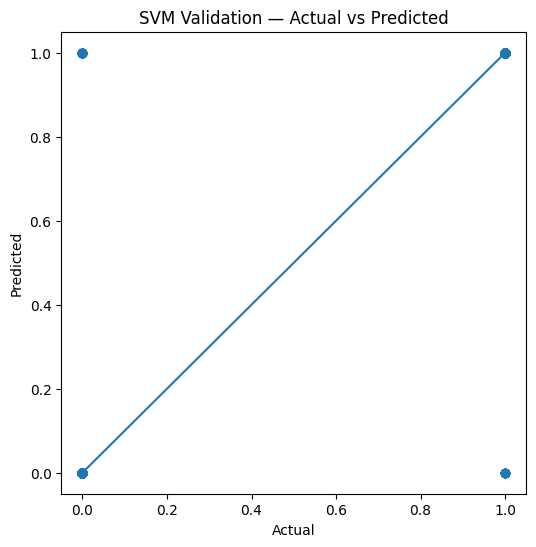

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, svm_val_pred)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVM Validation — Actual vs Predicted")
plt.show()



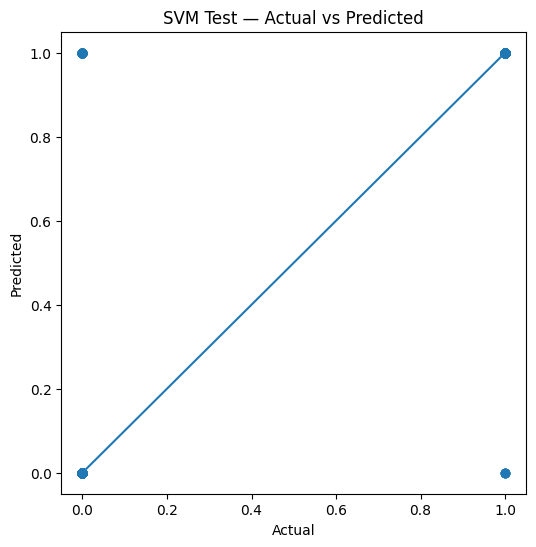

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, svm_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVM Test — Actual vs Predicted")
plt.show()



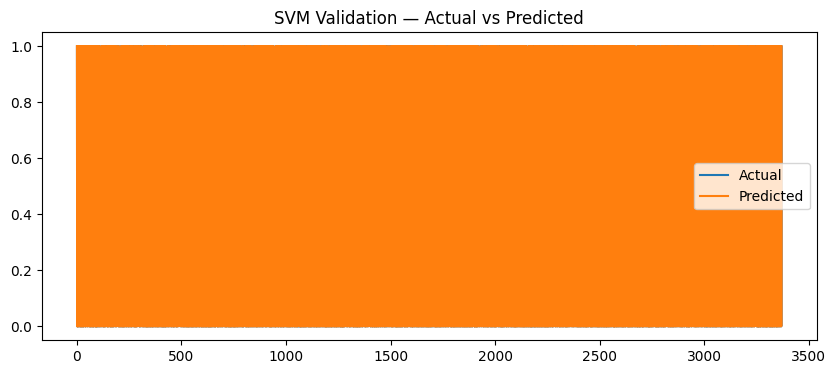

In [15]:
plt.figure(figsize=(10,4))
plt.plot(y_val.values, label="Actual")
plt.plot(svm_val_pred, label="Predicted")
plt.title("SVM Validation — Actual vs Predicted")
plt.legend()
plt.show()


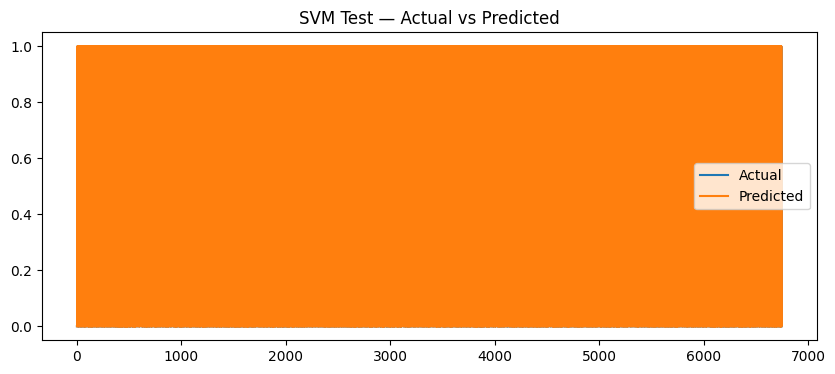

In [16]:
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label="Actual")
plt.plot(svm_test_pred, label="Predicted")
plt.title("SVM Test — Actual vs Predicted")
plt.legend()
plt.show()
